<h2> <center> ML Olympiad - Autism Prediction Challenge</center></h2>

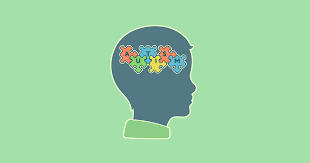


<h2 style='background:#1dd1cb; border:0; color:white'><center>Overview</center></h2>
This competition is An associated Kaggle Community Competitions hosted by ML GDEs or TFUGs, sponsored by Google Developers,Where the goal is 
to improve Autism Screening by creating predicting the likelihood of having this condition.

<h2 style='background:#1dd1cb; border:0; color:white'><center>Context</center></h2>

Autism, or autism spectrum disorder [ASD](https://www.autismspeaks.org/what-autism#:~:text=Autism%2C%20or%20autism%20spectrum%20disorder,in%20the%20United%20States%20today.), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.

**Signs of autism**
* Limited eye contact
* Limited sharing of sounds
* Not looking at objects being pointed to.
* Not speaking until an age later than is typical. 

**Causes and Challenges** 

It is mostly influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and problem-solve can range from highly skilled to severely challenged.

Research has made clear that high quality early intervention can improve learning, communication and social skills, as well as underlying brain development. Yet the diagnostic process can take several years.

Allowing Machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.


<h2 style='background:#1dd1cb; border:0; color:white'><center>About the data </center></h2>

The dataset used in this competitions is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism.

Luckily for us we have the data already grouped into files: 

**train.csv** - the training dataset 
**test.csv**- the test dataset
**sample_submission.csv** - a sample submission file in the correct format

The Columns are : 

* **ID** - ID of the patient
* **A1_Score** to **A10_Score** - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* **age** - Age of the patient in years
* **gender** - Gender of the patient
* **ethnicity** - Ethnicity of the patient
* **jaundice** - Whether the patient had jaundice at the time of birth
* **autism** - Whether an immediate family member has been diagnosed with autism
* **contry_of_res** - Country of residence of the patient
* **used_app_before** - Whether the patient has undergone a screening test before
* **result** - Score for AQ1-10 screening test
* **age_desc** - Age of the patient
* **relation** - Relation of patient who completed the test
* **Class/ASD** - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

<h2 style='background:#1dd1cb; border:0; color:white'><center>Notebook Set up </center></h2>
After getting an overview about the competition , now we need to explore and analyse our data , and for that we will start by importing some usual libraries like pandas , numpy , matplotlib and seaborn.

In [1]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns
from pathlib import Path
import missingno as msno
import plotly
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split ,KFold,StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc ,roc_auc_score
import optuna
from sklearn.preprocessing import LabelEncoder
from math import factorial
from scipy.stats import mode
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
import warnings
warnings.filterwarnings('ignore')
print("Packages Imported ")

Packages Imported 


#### Data loading 

In [2]:
data_path = Path('../input/autism-prediction/Autism-prediction')
train = pd.read_csv(data_path /'train.csv')
test  = pd.read_csv(data_path /'test.csv')
sample_sub= pd.read_csv(data_path /'sample_submission.csv')

<h2 style='background:#1dd1cb; border:0; color:white'><center> exploratory data analysis  </center></h2>

Now we can start explore our datasets  in order to get insghts. we will take a univariate analysis approach looking at each variable inn the data frame and how it might correlate to our target ( ASD presence ).

In [3]:
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [4]:
train.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


**General information about the train data**

In [5]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

(800, 22)

The train data comes with a shape of (800,22) including the ID and target variable, we have 12 variale of type int64 , 8 variables of type object and one variable ( age ) of float64 typ.

**Rename some columns**

In [6]:
train= train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res','Class/ASD':'Class'})
test= test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'})

**Basic summary statistic**

let's take a look at the summary statistics table ( information about Mean Max, Min and others )

In [7]:
train.describe().style.background_gradient(cmap='BuPu_r')

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.500000,0.582500,0.286250,0.321250,0.415000,0.457500,0.208750,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.084400,0.493455,0.452290,0.467249,0.493030,0.498502,0.406670,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


Now are going to take a deep look at each variable in our train data and explore how each variable relates to presence of autism with in the patient.

#### Autism by Gender 

The gender variable is ballanced in our train data , looking at the figure below we can see that autism is more present with in female then in males.

Text(0.5, 1.0, ' Counnts of Autism cases by gender')

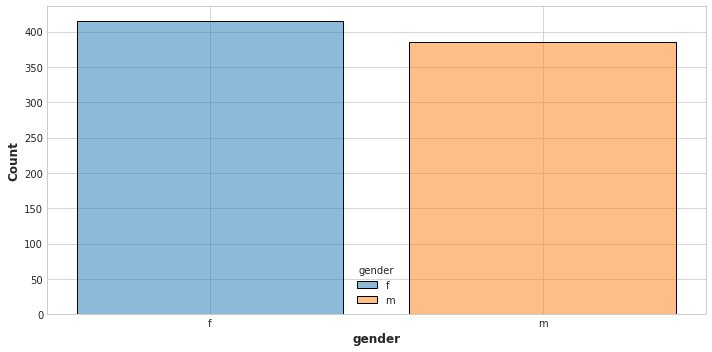

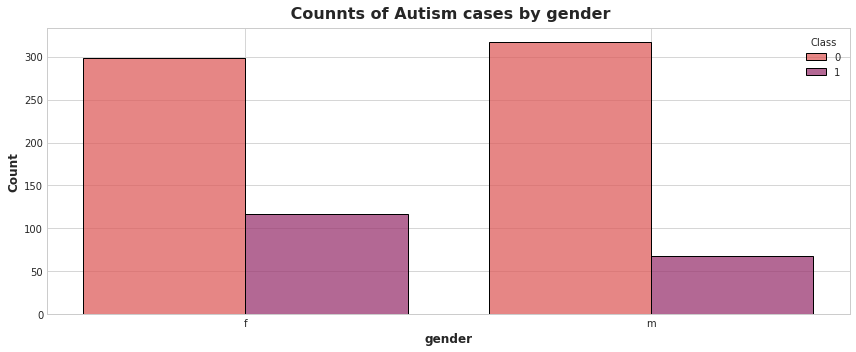

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(x= "gender", data=train,shrink=.8 ,hue = "gender");
#####
plt.figure(figsize=(12,5))
sns.histplot(data=train, x="gender", hue="Class", multiple="dodge", palette ='flare',shrink=.8)
plt.title(' Counnts of Autism cases by gender')


#### Autism by ethnicity 

Text(0.5, 1.0, 'Autism by ethnicity')

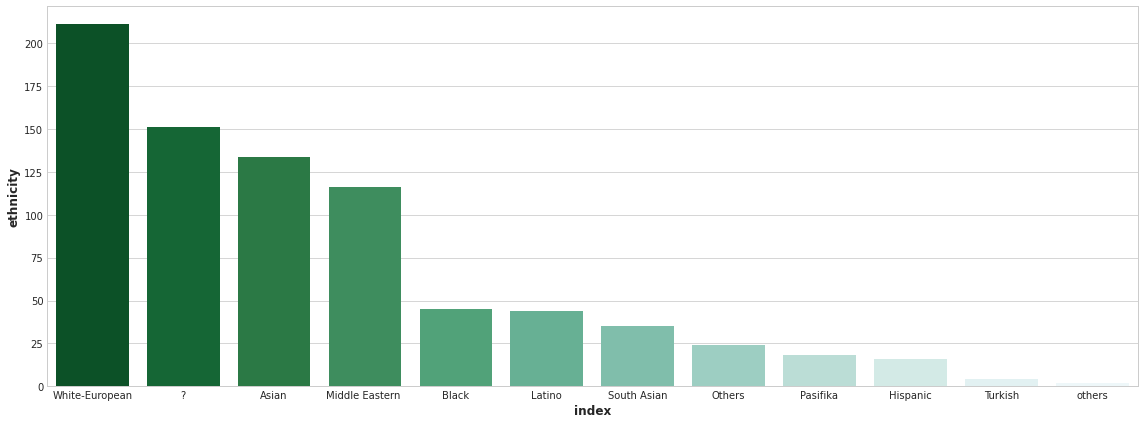

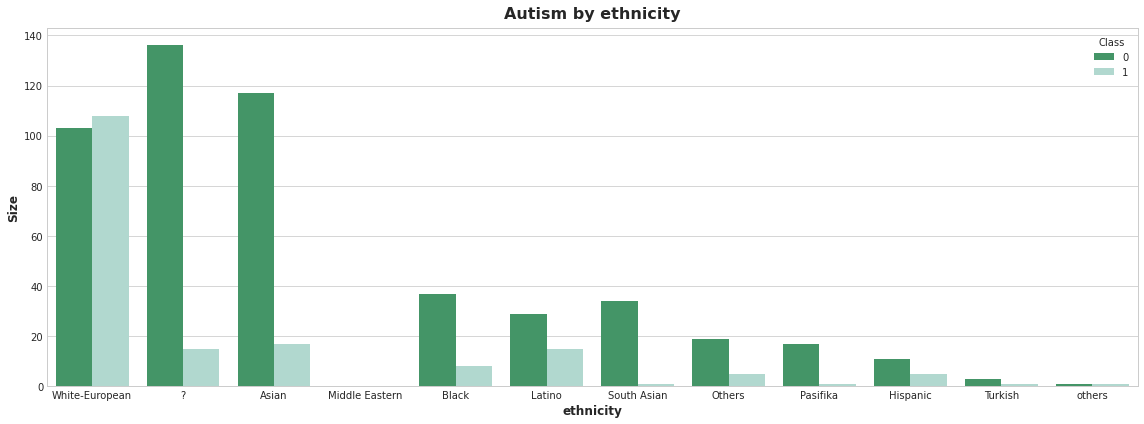

In [9]:
ethnicity_plt= train["ethnicity"].value_counts().reset_index()
ethnicity_plt.sort_values("ethnicity",ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(x="index",y="ethnicity",data=ethnicity_plt,palette="BuGn_r");
##########
plt.figure(figsize=(16,6))
ethnicity_plot=train.groupby(['ethnicity','Class']).size().reset_index(name='Size')
order=["White-European","?","Asian","Middle Eastern","Black","Latino","South Asian","Others","Pasifika","Hispanic","Turkish","others"]
sns.barplot(data=ethnicity_plot,x="ethnicity",y="Size",hue='Class', palette='BuGn_r',order=order)
plt.title("Autism by ethnicity")


We can see that our train data contains 11 diffrent races including others and "?" (uknown), white-european (211) is the most present ethnicity followed by ? (151) then Asian (134 ) , we have 2 cases identified by others. Now we want to check how autism relates to ethnicity.

#### Autism by country of residence 
let's now check how autism releates to country of residence , we have 61 unique country , it's going to be hard to visualize all of them so we will only see the 10 most presented country with in the train data.

Text(0.5, 1.0, ' Autism by country of residence ')

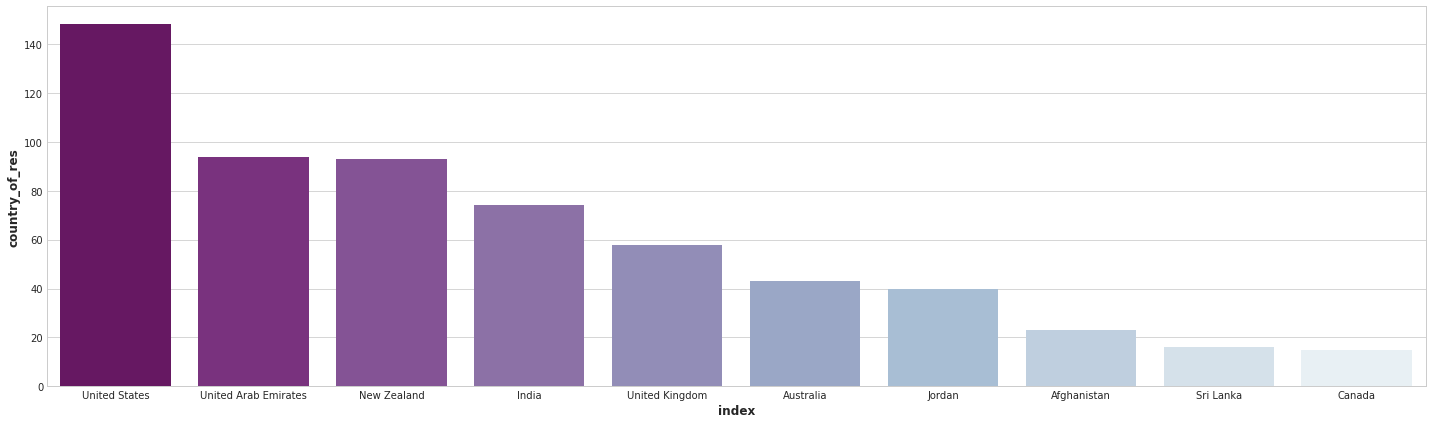

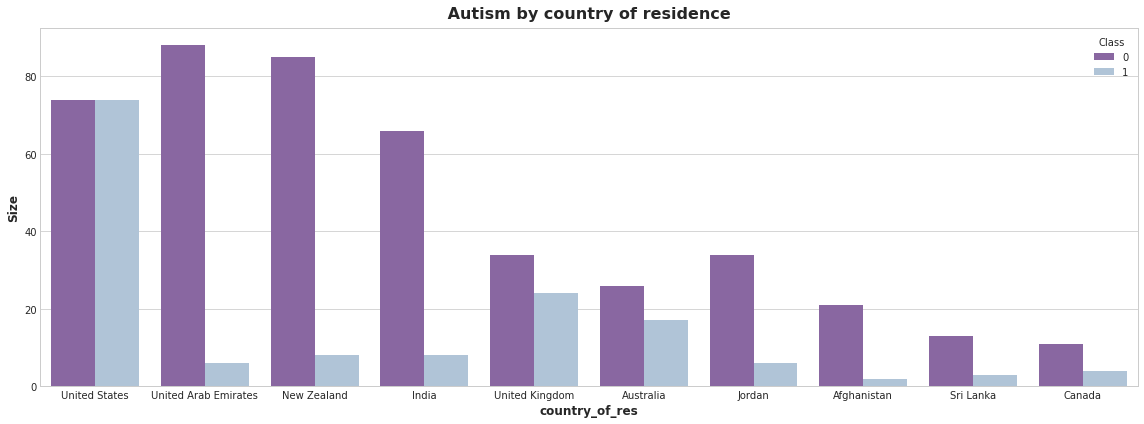

In [10]:
country_plt= train["country_of_res"].value_counts().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x="index",y="country_of_res",data=country_plt.sort_values("country_of_res",ascending=False).iloc[:10,:],palette="BuPu_r")
#####
plt.figure(figsize=(16,6))
country_plt=train.groupby(['country_of_res','Class']).size().reset_index(name='Size')
order=["United States","United Arab Emirates","New Zealand","India","United Kingdom","Australia","Jordan","Afghanistan","Sri Lanka","Canada"]
sns.barplot(data=country_plt,x="country_of_res",y="Size",hue='Class', palette='BuPu_r',order=order);
plt.title(' Autism by country of residence ')


* United states , united are emirates and new zealand are the most presented countries with in our train data ( 148, 94 , 93 respondent respectively).
* united states comes with equal class ( autism / non autism ) by 74 cases for each class , 
* united arab emirates / new zealand have have much no autism cases compared to autism presence..

#### Autism by jaundice 
Jaundice is a condition in which the skin, whites of the eyes and mucous membranes turn yellow , we want to check Whether jaundice condition. 

Text(0.5, 1.0, ' Autism by jaundice ')

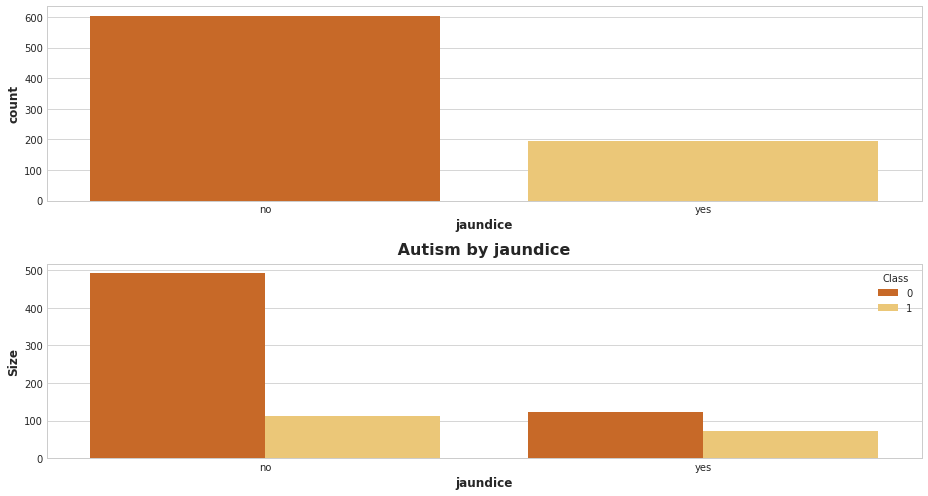

In [11]:
fig, ax = plt.subplots(2, 1,figsize=(13,7))
sns.countplot(x="jaundice",data=train,palette="YlOrBr_r",ax=ax[0])
jaundic_plt=train.groupby(['jaundice','Class']).size().reset_index(name='Size')
sns.barplot(data=jaundic_plt,x="jaundice",y="Size",hue='Class', palette='YlOrBr_r',ax=ax[1])
plt.title(' Autism by jaundice ')

#### Autism in family
Autism variable in our train data is a binary feature to tell Whether an immediate family member has been diagnosed with autism , looking at the two below plots we can see that our train less patients have an immediate family who have been diagnose for autism (around 100 patients ).Nevertheless patients who have an immediate familly diagnosed by autism are more likely to be affected by autism (Almost 60% ).


Text(0.5, 1.0, 'autism presence in the family ')

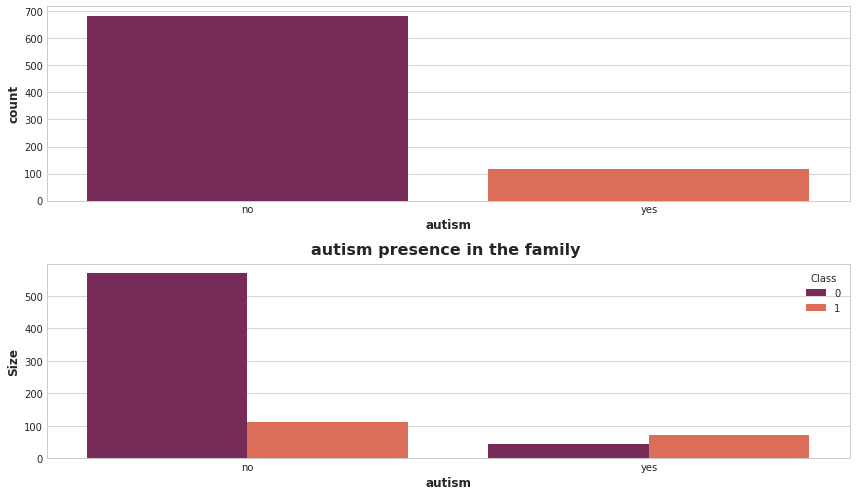

In [12]:
fig, ax = plt.subplots(2, 1,figsize=(12,7))
sns.countplot(x="autism",data=train,palette="rocket",ax=ax[0])
autusim_plt=train.groupby(['autism','Class']).size().reset_index(name='Size')
sns.barplot(data=autusim_plt,x="autism",y="Size",hue='Class', palette='rocket',ax=ax[1])
plt.title('autism presence in the family ')

#### Autism by screening test
**used_app_before** feature repersent Whether the patient has undergone a screening test before .


Text(0.5, 1.0, 'Autism by screening test')

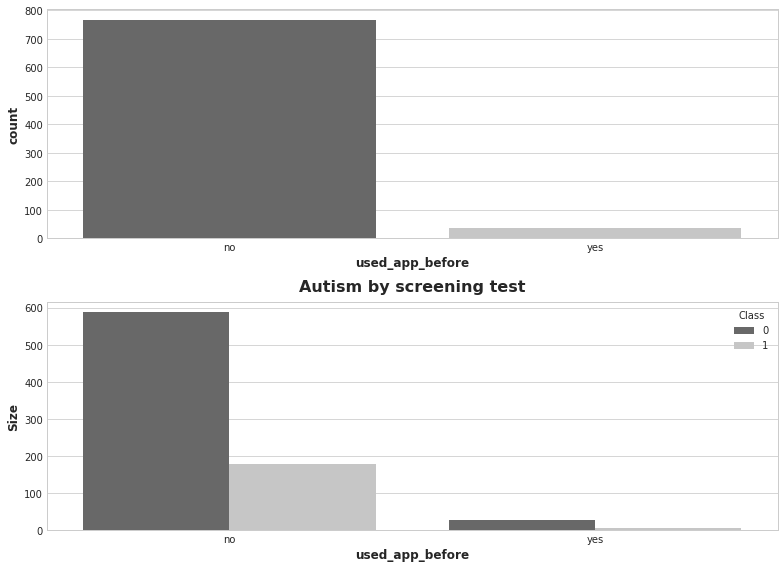

In [13]:
fig, ax = plt.subplots(2, 1,figsize=(11,8))
sns.countplot(x="used_app_before",data=train,palette="Greys_r",ax=ax[0])
used_app_before_plt=train.groupby(['used_app_before','Class']).size().reset_index(name='Size')
sns.barplot(data=used_app_before_plt,x="used_app_before",y="Size",hue='Class', palette='Greys_r',ax=ax[1])
plt.title('Autism by screening test')

* Looking at the above plots we can see that from 800 patients only 35 patients has undergone a screening test before. we can tell that autism presence is almost equal percentage  in the two cases ( around 20 %).

#### Relation of patient who completed the test

Text(0.5, 1.0, 'Relation of patient who completed the test')

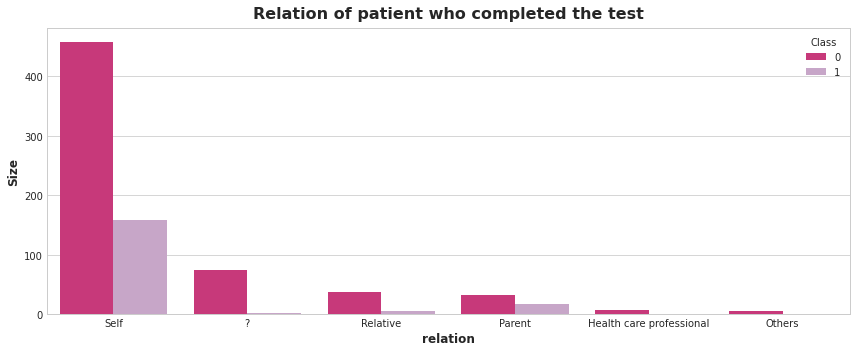

In [14]:
plt.figure(figsize=(12,5))
relation_plot=train.groupby(['relation','Class']).size().reset_index(name='Size')
sns.barplot(data=relation_plot.sort_values("Size",ascending=False),x="relation",y="Size",hue='Class', palette='PuRd_r')
plt.title("Relation of patient who completed the test")

* Most patients take the test themselves (617) , followed by 'unknown' (77) , then parents (49). 

#### Patients age Distribution 


In [15]:
print("Basic summary statistics for age column")
pd.DataFrame(train["age"].describe()).T

Basic summary statistics for age column


,count,mean,std,min,25%,50%,75%,max
age,800.0,28.612306,12.872373,9.560505,19.282082,25.47996,33.154755,72.402488


Text(0.5, 1.0, 'Relation of patient who completed the test')

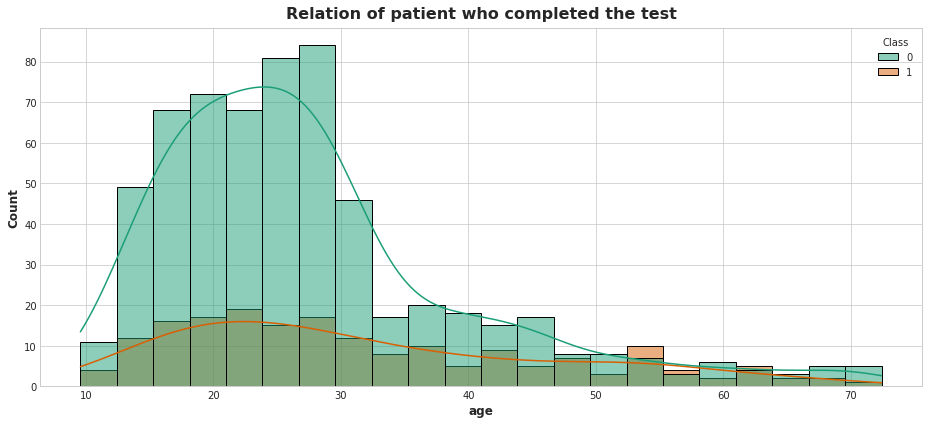

In [16]:
plt.figure(figsize=(13,6))
age_plot=train.groupby(['age','Class']).size().reset_index(name="size")
sns.histplot(data=age_plot,x='age',hue="Class" , kde=True , palette= 'Dark2');
#sns.rugplot(data=age_plot,x='age',hue="Class" , palette= 'brg')
plt.title("Relation of patient who completed the test")

#### A_Score Feature
**A1_Score** to **A10_score** is a  Score based on Autism Spectrum Quotient (AQ)10 item screening tool. it's a binary value ( 0 or 1 ), 


<Figure size 792x288 with 0 Axes>

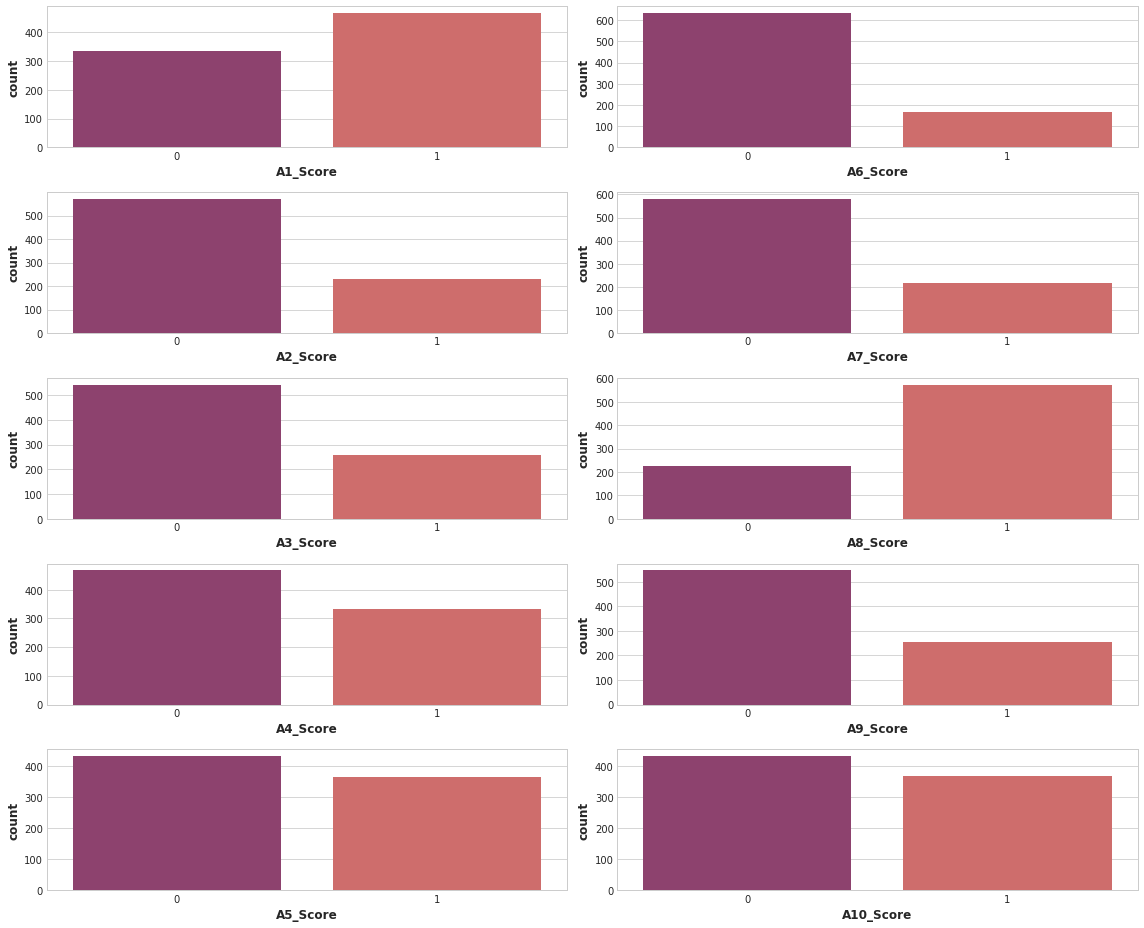

In [17]:
A_feat = ['A1_Score','A6_Score', 'A2_Score', 'A7_Score','A3_Score', 'A8_Score','A4_Score','A9_Score', 'A5_Score','A10_Score',]
i = 1
plt.figure()
fig, ax = plt.subplots(figsize=(16, 13))
for col in A_feat:
    plt.subplot(5,2,i)
    sns.countplot(x=train[col],data=train,palette="flare_r")
    i += 1
#plt.title("Screening Test scores distribution")  


#### Screening Test Result
the Result feature represent the Score for AQ1-10 screening test , it's a numirical feature 

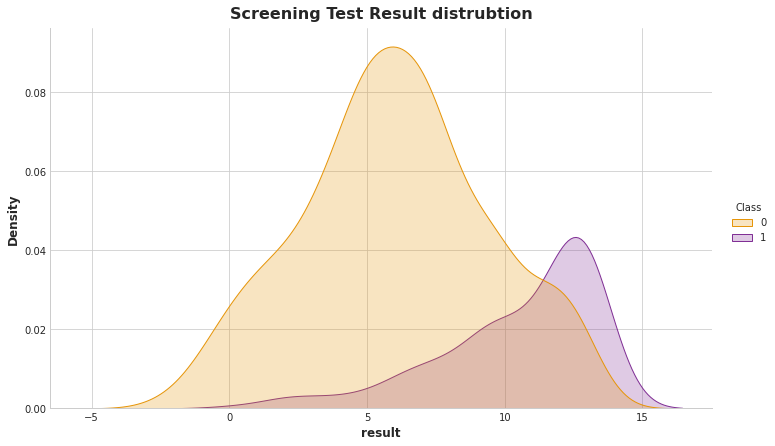

In [18]:
sns.displot(data=train,x='result',hue="Class" ,kind="kde", palette = "CMRmap_r",fill=True,height=6, aspect=1.7) ;
#sns.rugplot(data=age_plot,x='age',hue="Class" , palette= 'brg')
plt.title("Screening Test Result distrubtion")
plt.show()


#### Feature variation 
We want see how variant are our feature , that gives us idea which feature will be more important.

In [19]:
# variables variaition   
df_var=train.var().reset_index()
df_var.columns =['feature', 'variation']
df_var.sort_values("variation",ascending = False)

,feature,variation
0,ID,53400.000000
11,age,165.697979
12,result,14.356289
10,A10_Score,0.248711
5,A5_Score,0.248504
1,A1_Score,0.243498
4,A4_Score,0.243079
3,A3_Score,0.218321
9,A9_Score,0.216507
2,A2_Score,0.204567


#### Feature corelation 
Now we are going to see how numirical feature are correlated to other  , that would help us slecting features.

In [20]:
# Correlation matrix
corrMatrix =train.corr(method='pearson', min_periods=1)
corrMatrix.style.background_gradient(axis=None)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class
ID,1.000000,0.000033,0.020399,0.022980,0.019576,0.028487,0.034421,-0.000989,0.055880,0.033785,-0.010437,-0.027853,0.019915,0.061677
A1_Score,0.000033,1.000000,0.244540,0.316452,0.322089,0.350073,0.291400,0.201426,0.240094,0.308672,0.308402,0.068834,0.319993,0.289991
A2_Score,0.020399,0.244540,1.000000,0.387516,0.359008,0.295492,0.361972,0.262422,0.194671,0.401893,0.342131,0.120668,0.340213,0.380703
A3_Score,0.022980,0.316452,0.387516,1.000000,0.518000,0.448251,0.489724,0.352090,0.229524,0.539535,0.460727,0.189076,0.479438,0.549618
A4_Score,0.019576,0.322089,0.359008,0.518000,1.000000,0.540342,0.447535,0.353415,0.297467,0.523767,0.439180,0.182165,0.503638,0.512792
A5_Score,0.028487,0.350073,0.295492,0.448251,0.540342,1.000000,0.411152,0.381568,0.252989,0.486979,0.436171,0.121511,0.509091,0.448473
A6_Score,0.034421,0.291400,0.361972,0.489724,0.447535,0.411152,1.000000,0.374446,0.240317,0.510524,0.402234,0.144511,0.460065,0.542588
A7_Score,-0.000989,0.201426,0.262422,0.352090,0.353415,0.381568,0.374446,1.000000,0.154847,0.414423,0.310831,0.188604,0.399434,0.394660
A8_Score,0.055880,0.240094,0.194671,0.229524,0.297467,0.252989,0.240317,0.154847,1.000000,0.223737,0.250461,0.115754,0.232593,0.219034
A9_Score,0.033785,0.308672,0.401893,0.539535,0.523767,0.486979,0.510524,0.414423,0.223737,1.000000,0.488759,0.207493,0.536908,0.538688


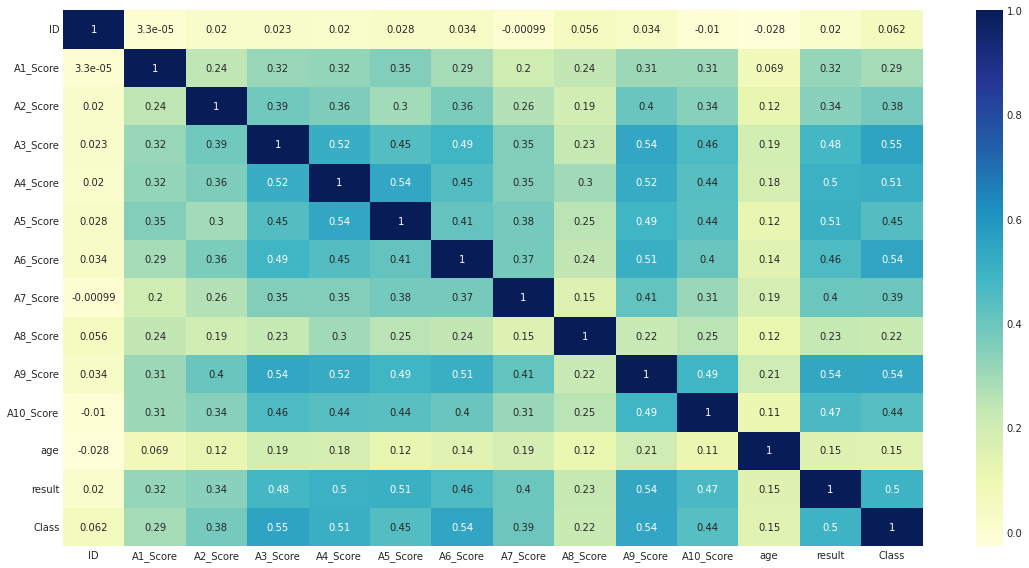

In [21]:
##heatmap 
plt.figure(figsize=(16,8))
ax = sns.heatmap(corrMatrix, cmap="YlGnBu",annot=True)

As expected some numirical features are more or less correlated to others , let's check the correlation with target.

In [22]:
cor_targ = train.corrwith(train["Class"]).reset_index()
cor_targ.columns =['Numerical feature', 'CorrelatioWithTarget']
cor_targ.sort_values('CorrelatioWithTarget',ascending = False)

,Numerical feature,CorrelatioWithTarget
13,Class,1.000000
3,A3_Score,0.549618
6,A6_Score,0.542588
9,A9_Score,0.538688
4,A4_Score,0.512792
12,result,0.496165
5,A5_Score,0.448473
10,A10_Score,0.439587
7,A7_Score,0.394660
2,A2_Score,0.380703


Look like features have close correlation values with the targt where A3 , A6 and A9 being most correlated to target.

#### Trgat variable 
our target is binary variable , we are predicting the likelihood of having autism.

In [23]:
print('percentage of each class:')
percent_value = pd.DataFrame(train['Class'].value_counts()/len(train))
percent_value.T

percentage of each class:


,0,1
Class,0.76875,0.23125


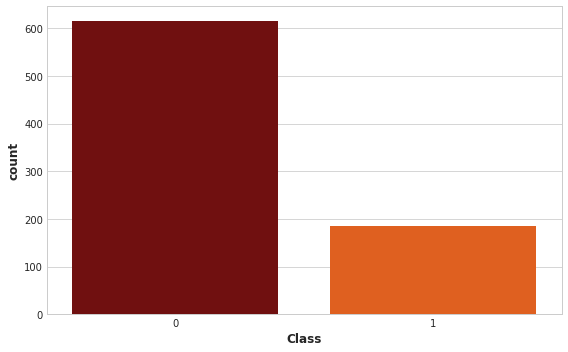

In [24]:
countplt, ax = plt.subplots(figsize = (8,5))
ax =sns.countplot(train['Class'],palette="gist_heat")


As we can see that train dataset has negative cases more than positive cases . 0.76875% of the data are no atism cases and 0.23125 are indeed autism case, which make it a sort of imbalanced binarry classification.

<h2 style='background:#1dd1cb; border:0; color:white'><center> Machine learning </center></h2>

After we take a look at our data and features, now are going to model it and take prediction for the test data , for that we are going to use [Extra trees Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html?highlight=extra%20tree%20classifier#sklearn.ensemble.ExtraTreesClassifier) ,and we use [Optuna](https://optuna.org/) to fine tune it's hyperparamaters. let's start. 

#### Data Preparation

In [27]:
X = train.drop(columns=["ID","Class",'used_app_before','result']).copy() #drop some usless features 
y = train["Class"].copy()
X_test = test.drop(columns=["ID",'used_app_before','result']).copy()

In [28]:
cat_col = [col for col in X.columns if X[col].dtype == 'object']
num_col = [col for col in X.columns if X[col].dtype == 'int']

**Label Encoder for categorical data**

In [29]:
label_encoder = LabelEncoder()
train_x = X.copy()
test_x = X_test.copy()
for col in cat_col:
        train_x[col] = label_encoder.fit_transform(train_x[col])
        test_x[col] = label_encoder.fit_transform(test_x[col]) 

In [30]:
train_x.shape , test_x.shape , y.shape

((800, 18), (200, 18), (800,))

#### Optuna hyperparamateres optimization 

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x,y ,test_size=0.15, random_state=42)
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",8,5000)
    max_depth = trial.suggest_int("max_depth", 4, 200)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 16)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 15)
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy'])
    clf = ExtraTreesClassifier(n_estimators = n_estimators,
                               max_depth = max_depth,
                               min_samples_split = min_samples_split, 
                               min_samples_leaf = min_samples_leaf,
                               criterion = criterion,
                               random_state = 42,
                              )
    clf.fit(X_train, y_train)
    return clf.score(X_valid, y_valid)

##### Optimize the function and retreive best paramaters

In [34]:
study = optuna.create_study(direction = "maximize") ##creat stuudy 
study.optimize(objective, n_trials =50) ## optimize study 

[I 2022-03-01 11:39:43,992] A new study created in memory with name: no-name-c29fdab9-ef3b-4c26-8146-2b5730e8b58a
[I 2022-03-01 11:39:48,590] Trial 0 finished with value: 0.8416666666666667 and parameters: {'n_estimators': 2793, 'max_depth': 127, 'min_samples_split': 9, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8416666666666667.
[I 2022-03-01 11:39:53,581] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 2964, 'max_depth': 49, 'min_samples_split': 13, 'min_samples_leaf': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.8416666666666667.
[I 2022-03-01 11:39:56,208] Trial 2 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 1645, 'max_depth': 128, 'min_samples_split': 4, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8416666666666667.
[I 2022-03-01 11:39:59,938] Trial 3 finished with value: 0.8416666666666667 and parameters: {'n_estimators': 2291, 'max_depth': 2

In [35]:
parameters = study.best_params
parameters

{'n_estimators': 3647,
 'max_depth': 75,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'criterion': 'gini'}

In [37]:
%%time
## Best hyper param from optuna study 
n_estimators = 3647
max_depth = 75
min_samples_split = 14
min_samples_leaf = 15
criterion = 'gini'
##
splits = 5 # number of folds 
predictions = [] # list of predictions 
scores = [] # auc_roc validation score 
feat_imp = pd.DataFrame() # get feat importance 
train_x = train_x.values ## convert Df to numpy array 
kf =  StratifiedKFold(n_splits=splits, shuffle=True, random_state=42) # creat folds 
###training extra trees classifier ### 
for fold, (idx_train, idx_valid) in enumerate(kf.split(train_x,y)):
    X_tr, y_tr = train_x[idx_train], y.iloc[idx_train]
    X_val, y_val = train_x[idx_valid], y.iloc[idx_valid]
    model =  ExtraTreesClassifier(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 criterion = criterion,
                                 random_state = 42)
    model.fit(X_tr,y_tr)
    val_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, val_pred)
    scores.append(score)
    print(f"Fold: {fold + 1} roc_auc Score is : {score}")
    fold_imp= pd.DataFrame()
    fold_imp["Feature"] = test_x.columns
    fold_imp["importance"] = model.feature_importances_
    fold_imp["fold"] = fold+ 1
    feat_imp = pd.concat([feat_imp, fold_imp], axis=0)
    print('*'*40)
    test_preds = model.predict_proba(test_x)[:, 1]
    predictions.append(test_preds)
print(f" mean Validation roc_aucis : {np.mean(scores)}")

Fold: 1 roc_auc Score is : 0.914744012304988
****************************************
Fold: 2 roc_auc Score is : 0.9310041749066139
****************************************
Fold: 3 roc_auc Score is : 0.9123269611074488
****************************************
Fold: 4 roc_auc Score is : 0.8932102834541858
****************************************
Fold: 5 roc_auc Score is : 0.9096901779828609
****************************************
 mean Validation roc_aucis : 0.9121951219512194
CPU times: user 31.3 s, sys: 211 ms, total: 31.5 s
Wall time: 31.5 s


#### Feature importance 

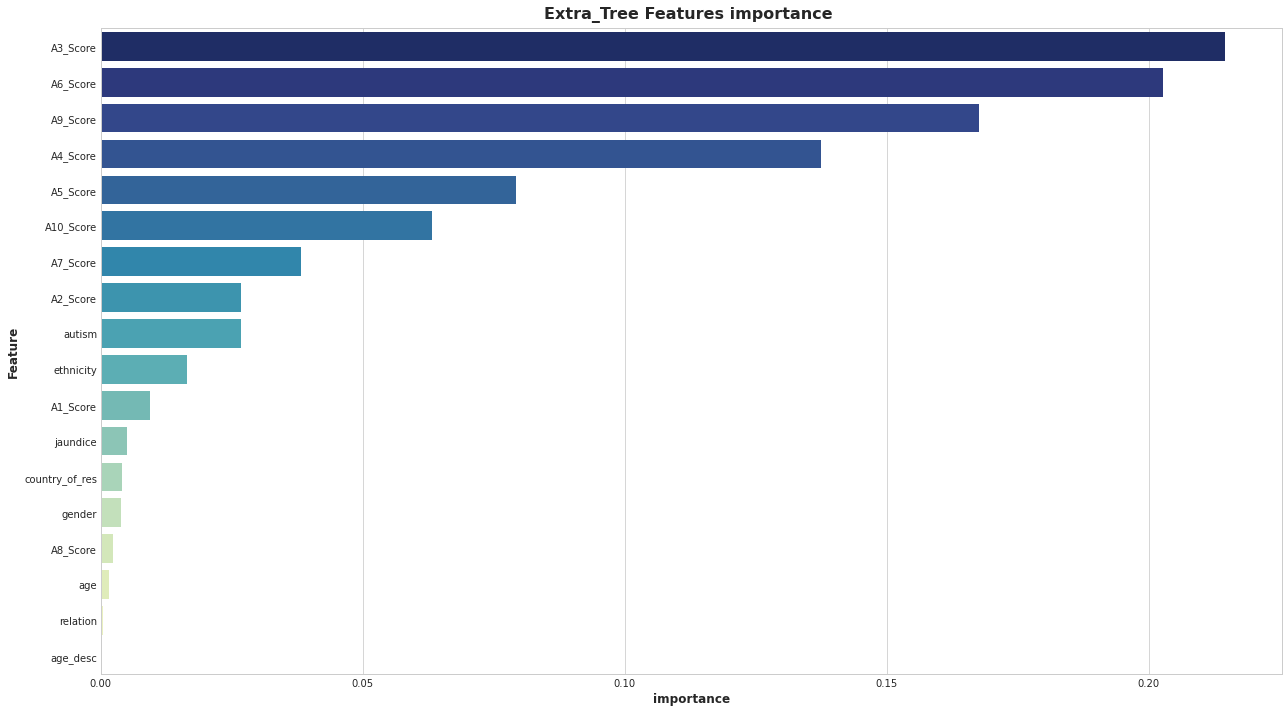

In [41]:
plot =feat_imp.groupby("Feature").mean().reset_index()
plt.figure(figsize=(18,10))
sns.barplot(x="importance", y="Feature", data=plot.sort_values(by="importance", ascending=False),palette = 'YlGnBu_r')
plt.title('Extra_Tree Features importance ')
plt.tight_layout()
plt.show()

### Submission 

<AxesSubplot:>

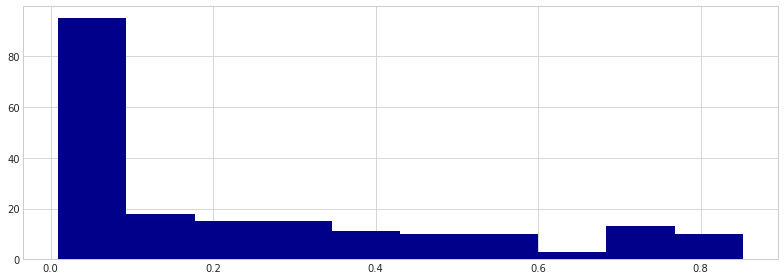

In [42]:
preds = np.array(predictions)
sample_sub["Class/ASD"] = preds.mean(axis=0) # take the mean from folds predic
sample_sub.to_csv("extra_tree_submission.csv",index=False)
sample_sub["Class/ASD"].hist(color ="darkblue")

<h3 style='background:#1dd1cb; border:double ; color:white'><center>Good luck </center></h3>
